# Tutorial 1.2 - Trending YouTube Videos Part 1
---

<img src="images/trending_videos_header.png" />

<i>This tutorial is based on these Kaggle notebooks: [Extensive USA Youtube](https://www.kaggle.com/kabure/extensive-usa-youtube-eda), [YouTube Trending Videos Analysis](https://www.kaggle.com/ammar111/youtube-trending-videos-analysis).</i>

In this notebook, we will explore how data can be loaded, processed and visualized using some of the most commonly used Python libraries.

The analysis will be based on the [Trending YouTube Video Statistics dataset](https://www.kaggle.com/datasnaek/youtube-new).

In the following cells, we will illustrate:
- How to import python libraries
- How to import data from a CSV file to a pandas dataframe
- How to manipulate a pandas dataframe
- How to use numpy to perform numerical operations
- How to use matplotlib and seaborn to visualize data

Through this notebook we will do a first simple analysis investigating: 
- Which type of YouTube videos are the most trending ones in the US and GB, 
- Who published the most trending videos
- When the videos were published
- And for how long they are trending


## Your task
---
First part (until "Setting up a virtual environment and install libraries")
- Go through the notebook to see the analysis based on the American subset (USvideos.csv). 
- Then try to reproduce the analysis for the British subset (GBvideos.csv) and compare the results.

Second part (until "Publishing time")
- Go through the notebook to set up a virtual environment and install the calplot library using magic commands

Third part (until the end)
- Go through the notebook to see the analysis based on the American subset (USvideos.csv). 
- Then try to reproduce the analysis for the British subset (GBvideos.csv) and compare the results.


## Import Python libraries
---
You can find the official documentation of each library here: [Pandas](https://pandas.pydata.org/pandas-docs/stable/), [Numpy](https://numpy.org/doc/), [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/stable/index.html)



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data import and first examination
---

In [5]:
# Importing data from a CSV file to a pandas dataframe
df_yout = pd.read_csv("USvideos.csv")

In [6]:
# Dimensions of the dataframe
print(df_yout.shape)

(40949, 16)


In [7]:
# Summary of index, datatypes and non-null values of each column 
df_yout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [8]:
# Number of unique values in each column
print(df_yout.nunique())

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [9]:
# Examining first rows of the data
df_yout.head(n=3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [10]:
# All entries for first-row video
df_yout[df_yout.video_id == df_yout.video_id[0]]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2524854,95587,7892,22038,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [11]:
# Some descriptive statistics
df_yout.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Adding category names to the dataframe
---

As you can see in the previous cells, the category of each video is determined by different values in "category_id". To map each value to a meaningful label, we will add a new column "category_name" to the dataframe. The correct labels for each value can be found in the JSON files attached to the [original dataset](https://www.kaggle.com/datasnaek/youtube-new). For this tutorial, we will just enter the category names manually. Next week we will look at a way to automatically extract that information from the JSON files.

In [12]:
# Add a new column "category_name" to the dataframe with NaN values
df_yout['category_name'] = np.nan

# Assign the correct labels that correspond to category_id
df_yout.loc[(df_yout["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yout.loc[(df_yout["category_id"] == 2),"category_name"] = 'Autos & Vehicles'
df_yout.loc[(df_yout["category_id"] == 10),"category_name"] = 'Music'
df_yout.loc[(df_yout["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yout.loc[(df_yout["category_id"] == 17),"category_name"] = 'Sport'
df_yout.loc[(df_yout["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yout.loc[(df_yout["category_id"] == 20),"category_name"] = 'Gaming'
df_yout.loc[(df_yout["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yout.loc[(df_yout["category_id"] == 23),"category_name"] = 'Comedy'
df_yout.loc[(df_yout["category_id"] == 24),"category_name"] = 'Entertainment'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News and Politics'
df_yout.loc[(df_yout["category_id"] == 26),"category_name"] = 'How to and Style'
df_yout.loc[(df_yout["category_id"] == 27),"category_name"] = 'Education'
df_yout.loc[(df_yout["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yout.loc[(df_yout["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yout.loc[(df_yout["category_id"] == 25),"category_name"] = 'News & Politics'

# Check if labels have been assigned
df_yout.head(n=3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


## Counts by video category
---
Let's start the analysis by looking at the total number of trending videos by category.

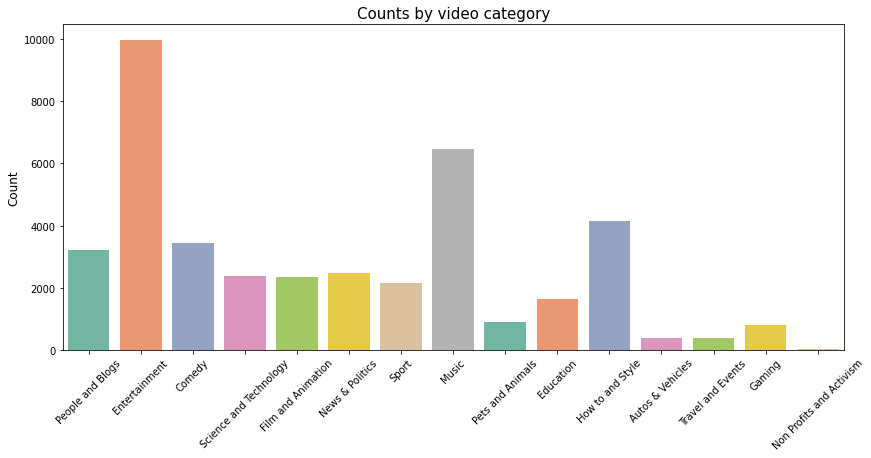

In [13]:
plt.figure(figsize = (14,6))

g = sns.countplot(x=df_yout['category_name'], palette="Set2")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counts by video category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

## Counts by channel
---
Next let's look at the channels with the most trending videos.

[Text(0, 0.5, 'Channel'), Text(0.5, 0, 'No. of videos')]

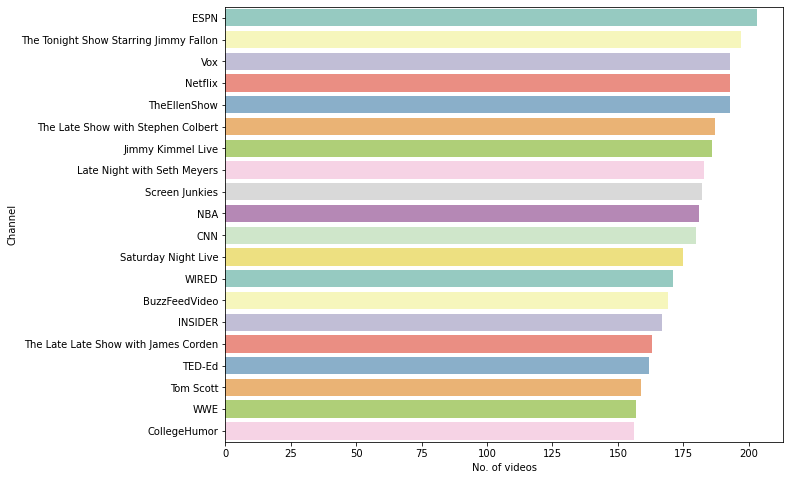

In [14]:
# Create groups of channels by the column "channel_title", determine the size of each group, sort them and plot the top 20
top_channels = df_yout.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="video_count", y="channel_title", data=top_channels, palette="Set3", ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel")


## __Now it's your turn!__
---
Reproduce the analysis using the British dataset (GBvideos.csv). Then compare the results with the ones from the American dataset.

__Hint:__ Use subplots to show the plots from each datasets right next to each other. This will make it easier to compare them. But be careful to use the same scaling for both plots!


## Setting up a virtual environment and install additional libraries
---
The environments provided by Anaconda, Noto, Colab etc. often already come with the most common libraries (e.g. pandas, numpy etc.) installed. However, sometimes you may want to use libraries that are not installed by default. In the following we want to see how we can add new libraries to our environment. We will therefore install [Calplot](https://calplot.readthedocs.io/en/latest/), a library to display events in a calendar. We will use calplot later on to display the publishing dates of the trending videos. 

Let's first see if we can already use calplot or not.


In [18]:
import calplot

If you have never used calplot on this environment before, the last cell will normally give you an error message. In this case you will have to install the calplot library. However, installing this library will make a modification to your current environment. Although this is not a major modification, we will use this as an opportunity to introduce __virtual environments.__

A short explanation why virtual environments are useful and how you can set them up can be found here: https://janakiev.com/blog/jupyter-virtual-envs/

Once you have set up the virtual environment, run this notebook in that kernel. We will then install the calplot library using the pip installer and the built-in [magic commands](https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab).  

In [19]:
# Use magic command for pip installer to install calplot
%pip install calplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## __Now it's your turn!__
---
Set up a virtual environment and install the calplot library using magic commands. Try to import the calplot library so that it can be used for the next part of the tutorial.


## Publishing time
---
Next let's look at when the videos were published. The publish_time column contains the information about the publishing year, month, day and time of the videos. However, the data from that column must first be formatted so we can use it for visualizations.

In [156]:
# Transform datatype of "publish_time" column to datetime 
df_yout['publish_time_formatted'] = pd.to_datetime(df_yout['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Extract month, hour min and sec from "publish_time"
df_yout['date'] = df_yout['publish_time_formatted'].dt.date
df_yout['year'] = df_yout['publish_time_formatted'].dt.year
df_yout['month'] = df_yout['publish_time_formatted'].dt.month
df_yout['time'] = df_yout['publish_time_formatted'].dt.time
df_yout['day'] = df_yout['publish_time_formatted'].dt.day
df_yout[['hour','min','sec']] = df_yout['time'].astype(str).str.split(':', expand=True).astype(int)

(<Figure size 900x1468.8 with 13 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d74d07400>,
       dtype=object))

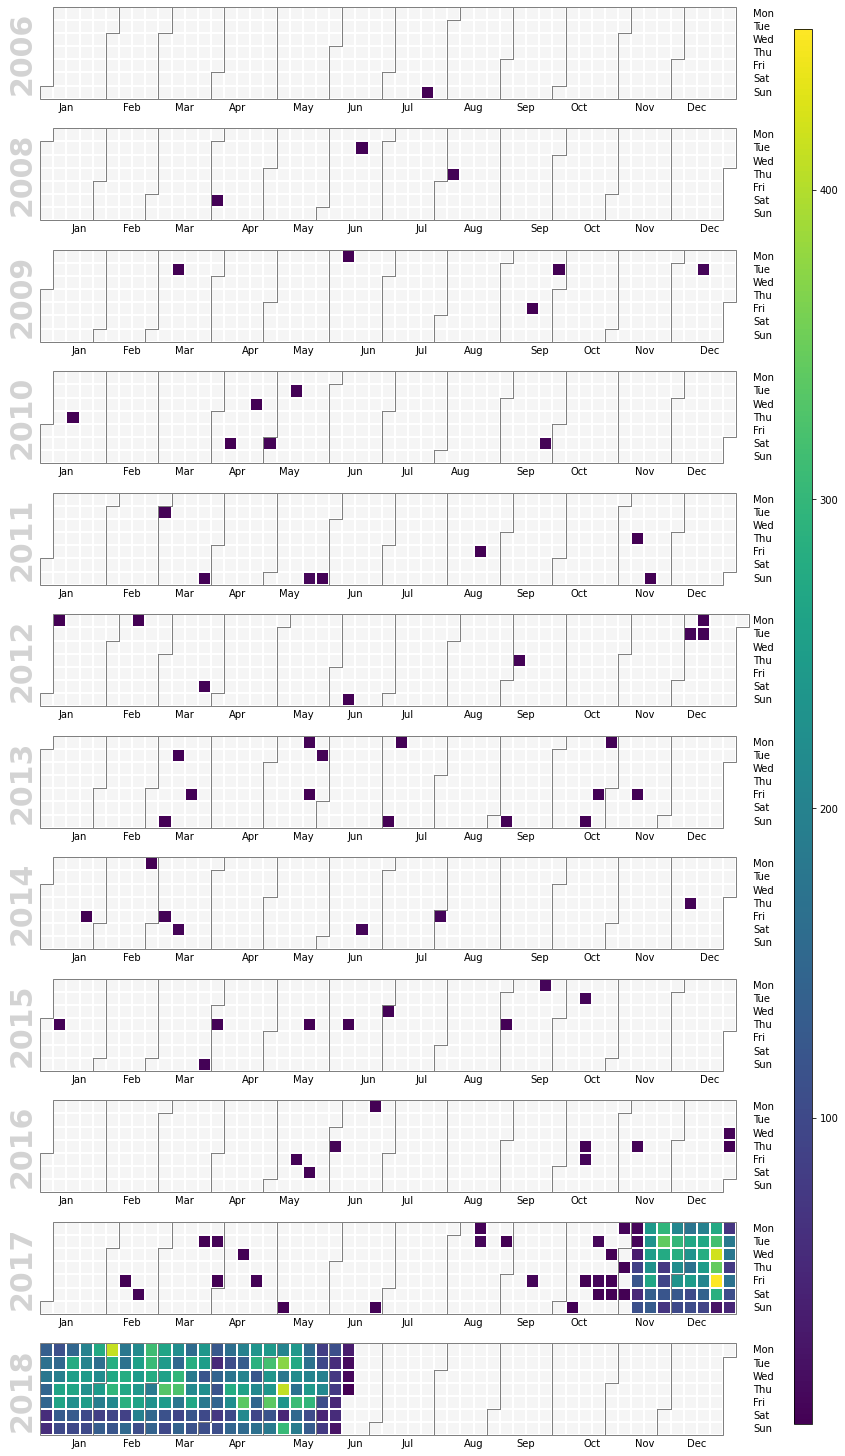

In [172]:
# Count duplicates for each date using pivot_table
counts_by_date = df_yout.pivot_table(index=['date'], aggfunc='size').reset_index()

# Add new column names
counts_by_date.columns =['Date', 'Counts'] 

# Create a Series with columns from counts_by_date to prepare for the use with calplot
counts_by_date_series = pd.Series(counts_by_date['Counts'])
counts_by_date_series.index = pd.DatetimeIndex(counts_by_date['Date'])

# Create calplot
calplot.calplot(counts_by_date_series)

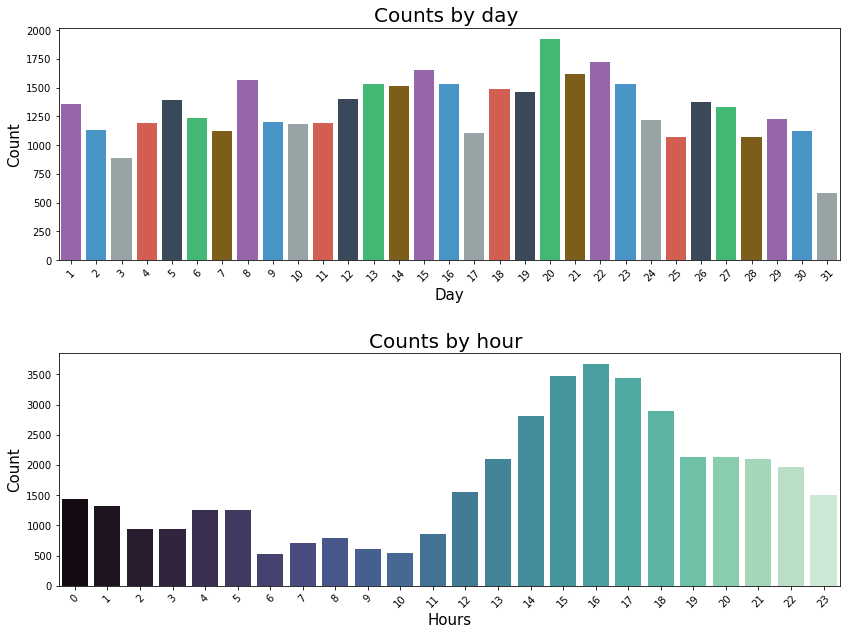

In [178]:
# Plot the results in subplots
plt.figure(figsize = (14,10))


plt.subplot(211)

# Define custom color palette for seven days
my_palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#8c6308"]

g = sns.countplot(x=df_yout['day'], palette=my_palette)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counts by day ", fontsize=20)
g.set_xlabel("Day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)

g = sns.countplot(x=df_yout['hour'], palette="mako")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counts by hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

## Trending duration
---
As it could be observed from the initial analysis, some videos are contained multiple times in the dataset, i.e. they were trending on several days. Let's analyze how many videos were trending for how many days.

In [176]:
# Count the the sum of each unique video in video_id and sort them from highest to lowest
trend_dur = df_yout['video_id'].value_counts(sort=True)

# Display the top 20 longest trending videos
trend_dur.head(20)

j4KvrAUjn6c    30
NBSAQenU2Bk    29
t4pRQ0jn23Q    29
r-3iathMo7o    29
8h--kFui1JA    29
QBL8IRJ5yHU    29
iILJvqrAQ_w    29
MAjY8mCTXWk    29
WIV3xNz8NoM    28
mdWcaWBxxcY    28
2PH7dK6SLC8    28
6S9c5nnDd_s    28
UfKmSfgFxi8    28
vjSohj-Iclc    28
ulNswX3If6U    28
YI3tsmFsrOg    28
6SuMbFuKDf8    27
1purAy2MsOc    27
nRc0kmOYgzQ    27
BspHjvU11y4    27
Name: video_id, dtype: int64

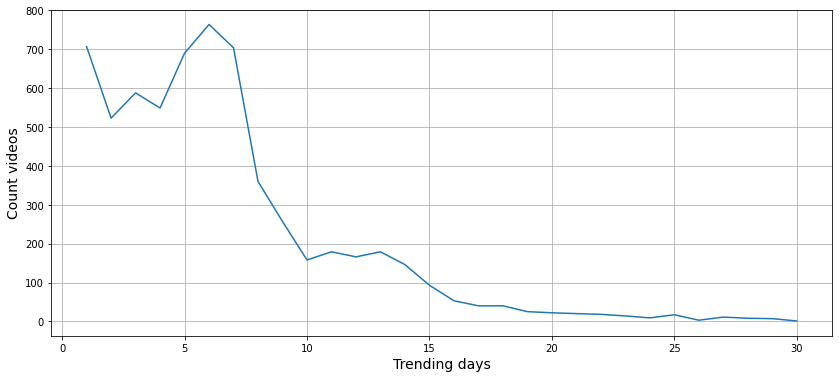

In [177]:
# Create new dataframe with number of videos per trending days 
df_counts = pd.DataFrame(trend_dur.value_counts().rename_axis('trending_days').reset_index(name='counts'))

# Sort dataframe by trending days
df_counts.sort_values(by=['trending_days'], inplace=True)

# Plot
plt.figure(figsize = (14,6))
plt.plot(df_counts['trending_days'],df_counts['counts'])
plt.xlabel("Trending days",fontsize=14)
plt.ylabel("Count videos",fontsize=14)
plt.grid()

## __Now it's your turn!__
---
Reproduce the analysis using the British dataset (GBvideos.csv). Then compare the results with the ones from the American dataset.

__Hint:__ Use subplots to show the plots from each datasets right next to each other. This will make it easier to compare them. But be careful to use the same scaling for both plots!

Finally, push the modified notebook to your GitHub repository.


## Summary
---
In this notebook, we have performed a first simple analysis with the Trending YouTube dataset. Through the analysis we have seen how we to use some of the most basic python libraries to import, process and visualize data. Moreover, we have explored how virtual environments can be set up and how additional libraries can be installed using the pip installer through magic commands.